In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("data")
np.random.seed(0)

"""Set the matplotlib configuration."""
plt.rcParams.update(plt.rcParamsDefault)
plt.rc("figure", dpi=300)
plt.rc("font", size=12, family="serif")
plt.rc("legend", frameon=False)
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")
plt.rc("lines", linewidth=2)

In [6]:
letters = ["a", "b", "c", "d", "e", "f", "g", "h"]

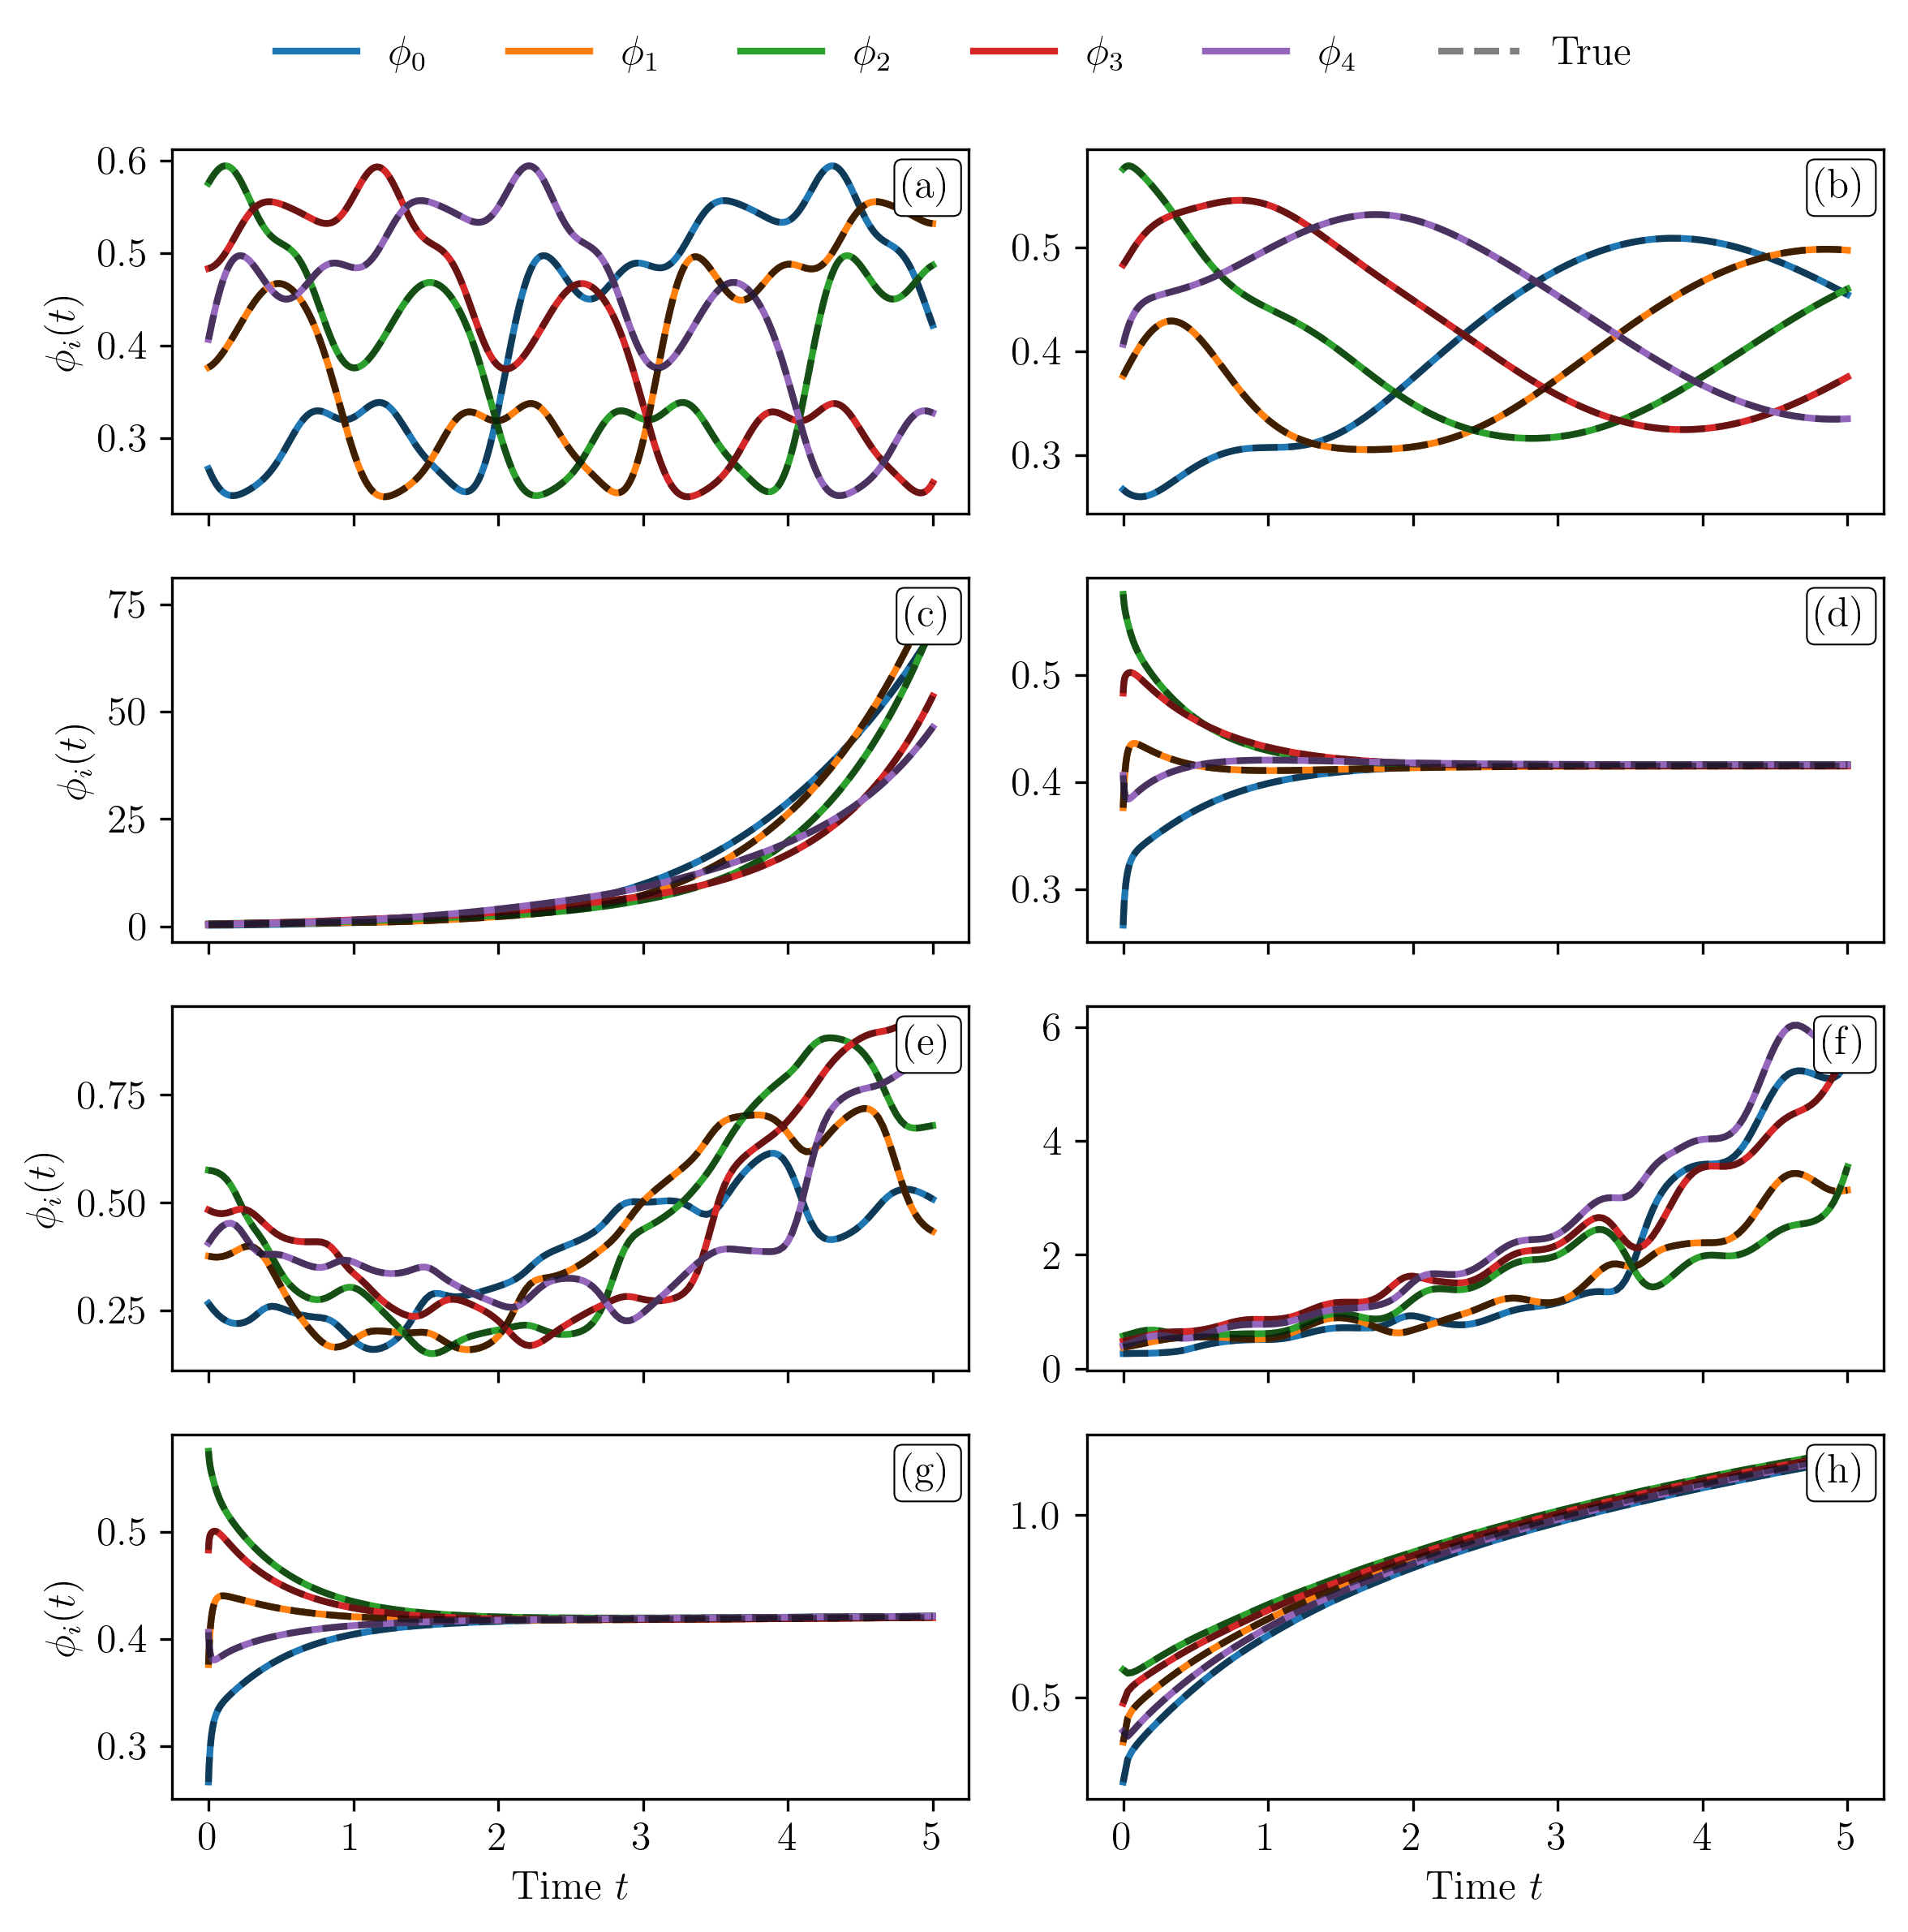

In [7]:
# Load solutions into list
sol_data = np.load("FD_sol.npz")
sol = [sol_data[f"sol{i}"] for i in range(1, 9)]

# Load PhiTest into list
PhiTest_data = np.load("FD_PhiTest.npz")
PhiTest = [PhiTest_data[f"PhiTest{i}"] for i in range(1, 9)]


# Load t_eval into list
t_data = np.load("FD_t_eval.npz")

t_eval = [t_data[f"t{i}"] for i in range(1, 9)]


fig, axes = plt.subplots(4, 2, figsize=(8, 8), sharex=True)
letters = ["a", "b", "c", "d", "e", "f", "g", "h"]
labels = [r"$\phi_0$", r"$\phi_1$", r"$\phi_2$", r"$\phi_3$", r"$\phi_4$"]

axes = axes.ravel()
for i in range(len(axes)):
    for j in range(sol[i].shape[1]):
        axes[i].plot(t_eval[i], sol[i][0][j], label=labels[j])
        axes[i].plot(t_eval[i], PhiTest[i][0][j], '--k', alpha=0.5)
    axes[i].plot(t_eval[i], PhiTest[i][0][1], '--k', label='True', alpha=0.5)
    if i % 2 == 0:
        axes[i].set_ylabel(r"$\phi_i(t)$")
    if i in [len(axes)-1, len(axes)-2]:
        axes[i].set_xlabel(r"Time $t$")
    axes[i].text(
    .98, 0.95, f"({letters[i]})",
    transform=axes[i].transAxes,
    fontsize=12,
    fontweight="bold",
    va="top", ha="right",
    bbox=dict(facecolor="white", edgecolor="black", linewidth=0.5, boxstyle="round,pad=0.2"),
    zorder=10, clip_on=False
)
    

    
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
fig.savefig("FD_eq1.pdf", format="pdf", bbox_inches="tight")

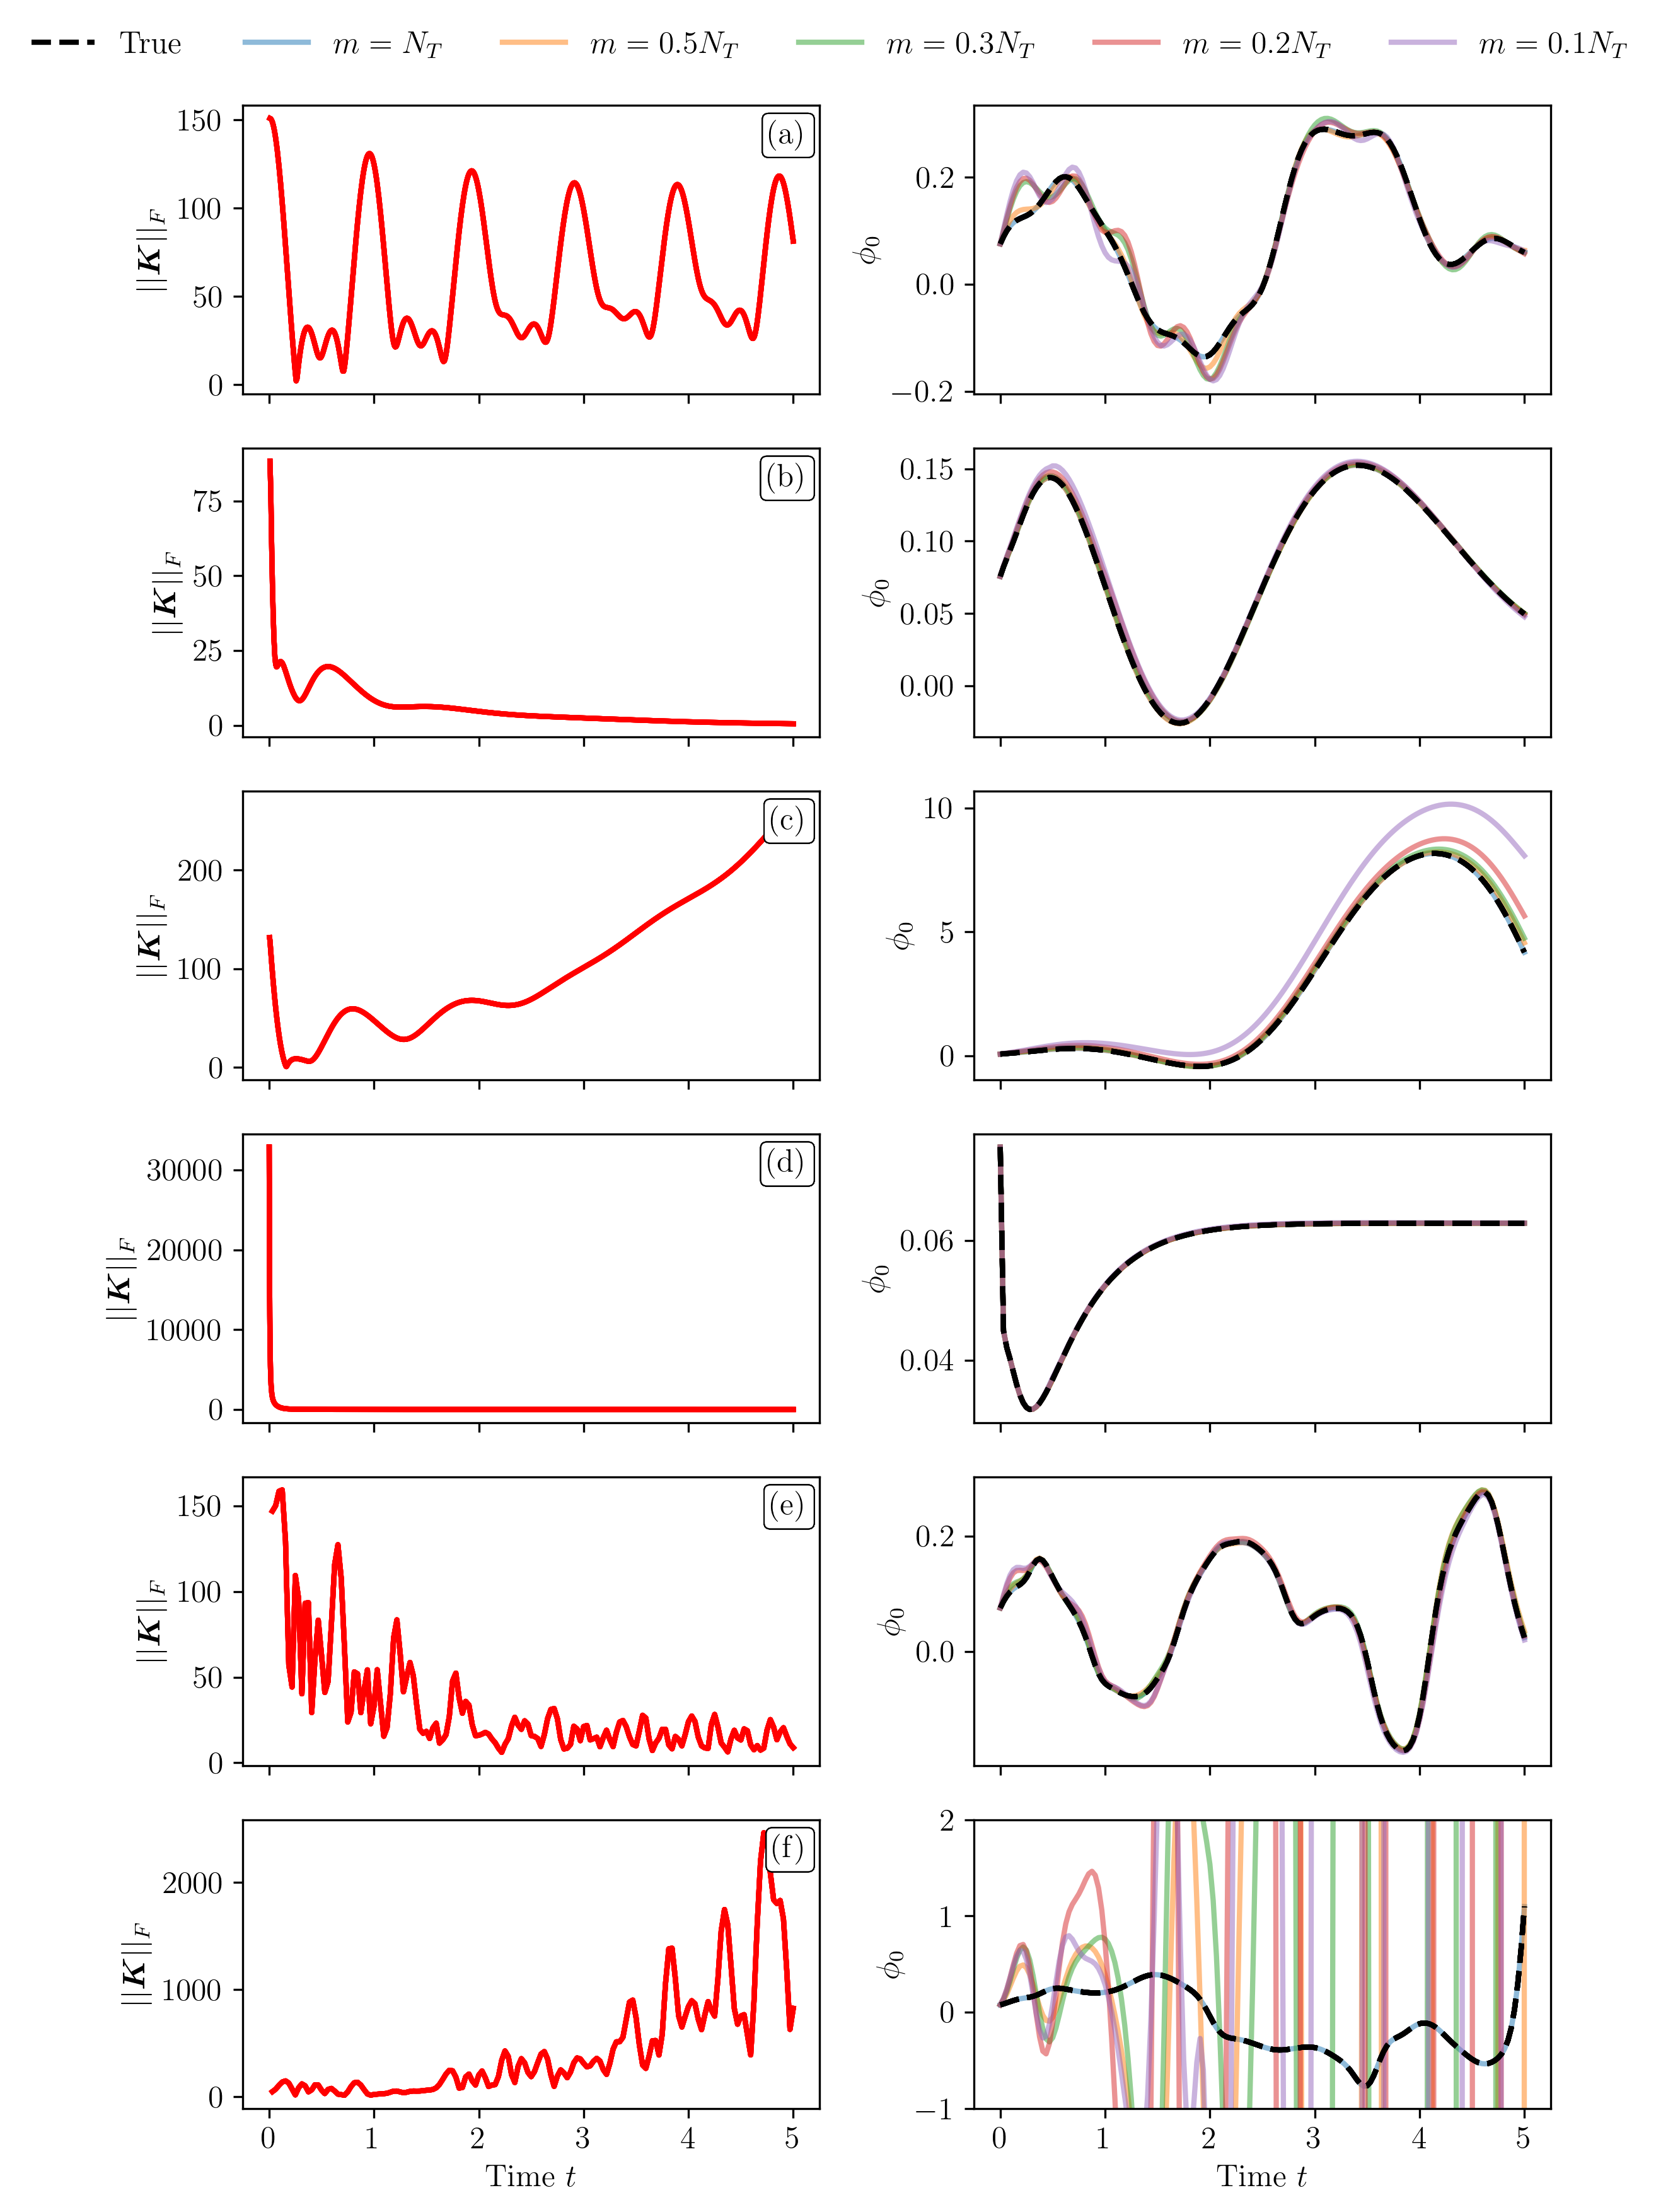

In [8]:
# Load solutions into list
sol_data = np.load("FD_sol_2.npz")
sol = [sol_data[f"sol{i}"] for i in range(1, 7)]
K_data = np.load("FD_K.npz")
K = [K_data[f"K{i}"] for i in range(1, 7)]


dt = 0.03125
Nt = int(5 / dt)
t_eval2 = np.linspace(0, 5, Nt + 1)


fig, axes = plt.subplots(6, 2, figsize=(8, 12), sharex=True)
letters = ["a", "b", "c", "d", "e", "f"]
labels = [r"$m=N_T$", r"$m=0.5N_T$", r"$m=0.3N_T$", r"$m=0.2N_T$", r"$m=0.1N_T$"]

axes = axes.ravel()
index = -1
axes[1].plot(t_eval2, sol[0][0, index, 0], "--k", label="True") 

for i in range(len(axes)):
    for j in range(sol[0].shape[0]):
        if i % 2 != 0:
            axes[i].plot(t_eval2, sol[i//2][j, index, 0], label=labels[j], alpha=0.5)
            axes[i].plot(t_eval2, sol[i//2][0, index, 0], "--k")
        
        else:
            axes[i].plot(
                t_eval[i//2][1:], [np.linalg.norm(k) for k in K[i//2].transpose(2,0,1)], "-r"
            )
            axes[i].text(
                .98, 0.95, f"({letters[i//2]})",
                transform=axes[i].transAxes,
                fontsize=12,
                fontweight="bold",
                va="top", ha="right",
                bbox=dict(facecolor="white", edgecolor="black", linewidth=0.5, boxstyle="round,pad=0.2"),
                zorder=10, clip_on=False)

    if i % 2 != 0:
        axes[i].set_ylabel(r"$\phi_0$")
    else:
        axes[i].set_ylabel(r"$||\boldsymbol K||_F$")

    if i in [len(axes)-1, len(axes)-2]:
        axes[i].set_xlabel(r"Time $t$")
    
    axes[-1].set_ylim(-1, 2)

axes[-1].plot(t_eval2, sol[-1][0,index,0], "--k") 
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 0.98),)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
fig.savefig("FD_eq1_PH.pdf", format="pdf", bbox_inches="tight", dpi=400)

In [3]:
# Load solutions into list
sol_data = np.load("FD_sol_wave.npz")
sol = [sol_data[f"sol{i}"] for i in range(1, 4)]


# Load PhiTest into list
PhiTest_data = np.load("FD_PhiTest_wave.npz")
PhiTest = [PhiTest_data[f"PhiTest{i}"] for i in range(1, 4)]

sol_data2 = np.load("FD_sol_2_wave.npz")
sol2 = [sol_data2[f"sol{i}"] for i in range(1, 4)]
K_data = np.load("FD_K_wave.npz")
K = [K_data[f"K{i}"] for i in range(1, 4)]
# Load t_eval into list
t_data = np.load("FD_t_eval_wave.npz")

t_eval = [t_data[f"t{i}"] for i in range(1, 4)]

In [4]:
dt = 0.0625
Nt = int(2*np.pi / dt)
t_eval2 = np.linspace(0, 2*np.pi, Nt + 1)

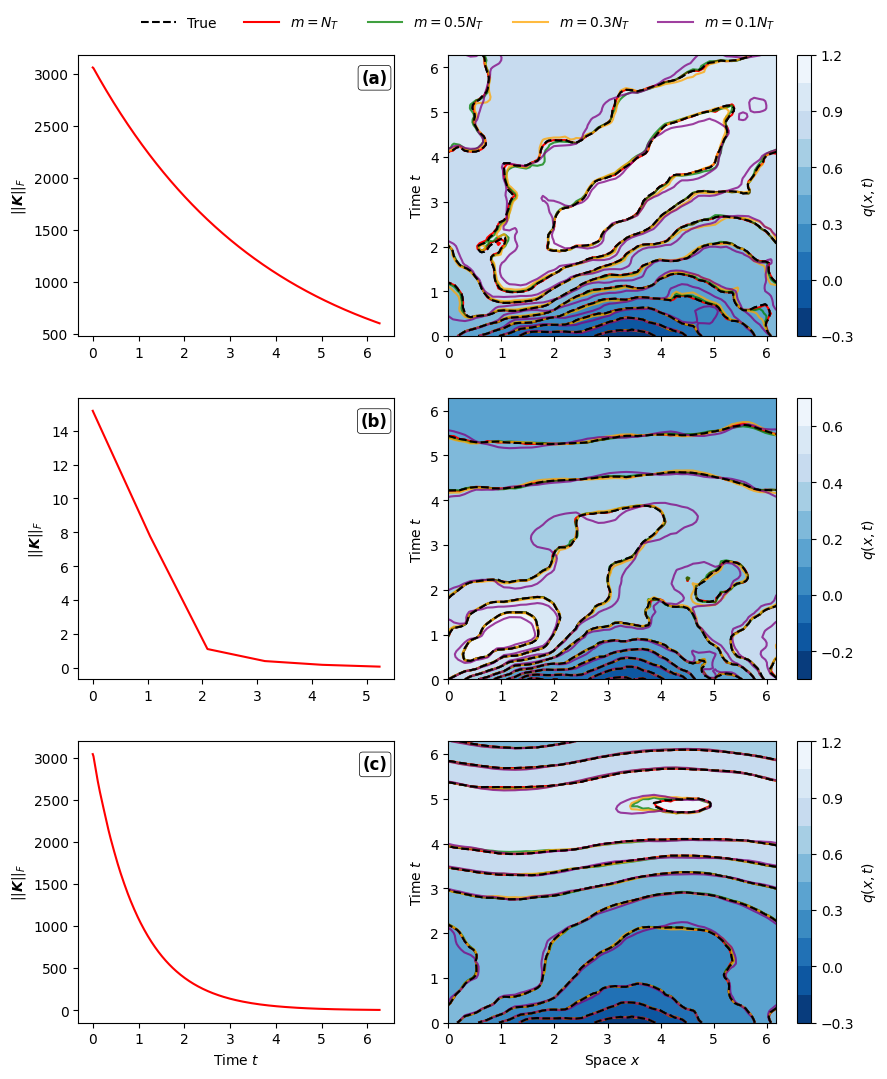

In [6]:
import numpy as np
from matplotlib.lines import Line2D


x = np.linspace(0, np.pi*2, 60, endpoint=False)   
# assumes: t_eval, FO.x, sol3_2 are already defined
tt, xx = np.meshgrid(t_eval2, x)
idx = 1
levels=10
fig, axs = plt.subplots(3, 2, figsize=(10, 11),  gridspec_kw={"width_ratios": [1, 1.3]} )

# replicate the same plot in the first column
for r in range(3):
    ax = axs[r, 1]
    
    cf = ax.contourf(xx, tt, sol2[r][0,idx], levels=levels, cmap="Blues_r")
    cbar = fig.colorbar(cf, ax=ax, location="right", pad=0.05)
    cbar.set_label(r"$q(x,t)$")

    true=ax.contour(xx, tt, PhiTest[r][idx], linestyles="dashed", levels=levels, colors="black", )
    ax.contour(xx, tt, sol2[r][0,idx],  linestyles="solid", levels=true.levels, colors="red")
    ax.contour(xx, tt, sol2[r][1,idx],  linestyles="solid", levels=true.levels, colors="green",  alpha=0.75)
    ax.contour(xx, tt, sol2[r][2,idx],  linestyles="solid", levels=true.levels, colors="orange",  alpha=0.75)
    ax.contour(xx, tt, sol2[r][-1,idx], linestyles="solid", levels=true.levels, colors="purple", alpha=0.75)
    true=ax.contour(xx, tt, PhiTest[r][idx], linestyles="dashed", levels=levels, colors="black", )
    #ax.set_ylim(0, 6)
    ax.set_ylabel(r"Time $t$")
ax.set_xlabel(r"Space $x$")

for r in range(3):
    ax2 = axs[r, 0]
    ax2.plot(t_eval[r][:-1], [np.linalg.norm(k) for k in K[r].transpose(2,0,1)], "-r")
    ax2.set_ylabel(r"$||\boldsymbol{K}||_F$")
    ax2.text(
    .98, 0.95, f"({letters[r]})",
    transform=ax2.transAxes,
    fontsize=12,
    fontweight="bold",
    va="top", ha="right",
    bbox=dict(facecolor="white", edgecolor="black", linewidth=0.5, boxstyle="round,pad=0.2"),
    zorder=10, clip_on=False)

    
ax2.set_xlabel(r"Time $t$")

# global legend (same as your single-axes version)
handles = [
    Line2D([], [], linestyle="--", color="black",  label=r"True"),
    Line2D([], [], linestyle="-", color="red",  label=r"$m=N_T$"),
    Line2D([], [], linestyle="-", color="green",  alpha=0.75, label=r"$m=0.5N_T$"),
    Line2D([], [], linestyle="-", color="orange",  alpha=0.75, label=r"$m=0.3N_T$"),
    Line2D([], [], linestyle="-", color="purple", alpha=0.75, label=r"$m=0.1N_T$"),
]
fig.legend(
    handles=handles,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=5,
    frameon=False,
    handlelength=2.5,
)

fig.subplots_adjust(top=0.99, hspace=0.22, wspace=0.15, left=0.12)

plt.show()


In [66]:
fig.savefig("FD_wave.pdf", format="pdf", bbox_inches="tight", dpi=400)